<a href="https://colab.research.google.com/github/AFBA1993/Projects/blob/main/TemporalSeries/BITcoinLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### **DATA PREPROCESSING**

In [24]:
data = pd.read_csv("/content/drive/MyDrive/DatasetsTemporalSeries/Bitcoin.csv")

In [25]:
data = data[["Close", "Timestamp"]]

In [26]:
data.isnull().sum()

Close        1243608
Timestamp          0
dtype: int64

In [27]:
data.dropna(inplace = True)

In [28]:
data.index = pd.to_datetime(data["Timestamp"].astype(int), unit='s')
data.drop("Timestamp", axis = 1, inplace =  True)
data.tail()

,Close
Timestamp,
2021-03-30 23:56:00,58686.00
2021-03-30 23:57:00,58685.81
2021-03-30 23:58:00,58723.84
2021-03-30 23:59:00,58760.59
2021-03-31 00:00:00,58778.18


In [29]:
data_day = data.resample('D').mean()
data_day.isnull().sum()

Close    3
dtype: int64

In [30]:
data_day.dropna(inplace = True)

In [33]:
train = data_day.loc['2011-12-31' : '2019-09-28'].copy()
test = data_day.loc['2019-09-29' : '2021-03-31'].copy()

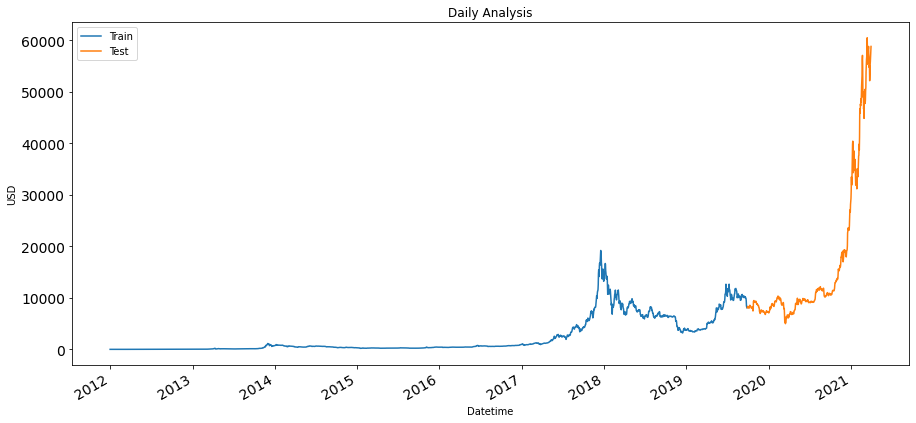

In [34]:
train.Close.plot(figsize = (15,7), title = 'Daily Analysis', fontsize =14, 
                                                              label = 'Train')
test.Close.plot(figsize = (15,7), title = 'Daily Analysis', fontsize =14, 
                                                          label = 'Test')
plt.xlabel('Datetime')
plt.ylabel('USD')
plt.legend(loc = 'best')

In [35]:
normalizer = MinMaxScaler(feature_range = (0,1))
train_norm = normalizer.fit_transform(train)

In [36]:
forecasters_train = []
actual_value_train = []

In [37]:
train.size

2826

In [38]:
for i in range(100, 2826):
  forecasters_train.append(train_norm[i-100:i,0])
  actual_value_train.append(train_norm[i, 0])

In [39]:
forecasters_train , actual_value_train = np.array(forecasters_train), \
                                         np.array(actual_value_train)

In [43]:
print(forecasters_train.shape[0],
      forecasters_train.shape[1])

2726 100


In [44]:
forecasters_train = np.reshape(forecasters_train, (2726, 100, 1))

### **IMPLEMENTING LSTM:**

In [45]:
regressor = Sequential()
regressor.add(LSTM(units = 150, return_sequences = True,
                   input_shape = (forecasters_train.shape[1], 1)))
regressor.add(Dropout(0.3))

In [46]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))

In [47]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))

In [48]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.3))

In [49]:
regressor.add(Dense(units = 1, activation = 'linear'))

In [50]:
regressor.compile(optimizer = 'rmsprop', loss = 'mse',
                  metrics = ['mse'])

In [51]:
regressor.fit(forecasters_train, actual_value_train, 
                      epochs = 100, batch_size = 32)

Epoch 1/100
86/86 [==============================] - 31s 268ms/step - loss: 0.0069 - mse: 0.0069
Epoch 2/100
86/86 [==============================] - 23s 268ms/step - loss: 0.0034 - mse: 0.0034
Epoch 3/100
86/86 [==============================] - 23s 269ms/step - loss: 0.0028 - mse: 0.0028
Epoch 4/100
86/86 [==============================] - 23s 270ms/step - loss: 0.0026 - mse: 0.0026
Epoch 5/100
86/86 [==============================] - 23s 268ms/step - loss: 0.0022 - mse: 0.0022
Epoch 6/100
86/86 [==============================] - 23s 267ms/step - loss: 0.0021 - mse: 0.0021
Epoch 7/100
86/86 [==============================] - 23s 268ms/step - loss: 0.0017 - mse: 0.0017
Epoch 8/100
86/86 [==============================] - 23s 269ms/step - loss: 0.0019 - mse: 0.0019
Epoch 9/100
86/86 [==============================] - 23s 269ms/step - loss: 0.0016 - mse: 0.0016
Epoch 10/100
86/86 [==============================] - 23s 268ms/step - loss: 0.0015 - mse: 0.0015
Epoch 11/100
86/86 [=========

### **TEST DATA PREPARATION:**

In [69]:
complete_data = pd.concat((train, test), axis = 0)

In [71]:
input_test = complete_data[len(complete_data) - len(test) - 100:]

In [73]:
input_test_norm = normalizer.transform(input_test)
input_test_norm

array([[0.51069086],
       [0.55880672],
       [0.55993415],
       [0.56502296],
       [0.58949503],
       [0.65877286],
       [0.61501207],
       [0.60845823],
       [0.61745532],
       [0.60125481],
       [0.55683744],
       [0.53688928],
       [0.59113703],
       [0.61272228],
       [0.58045912],
       [0.59478918],
       [0.58937391],
       [0.61450588],
       [0.65202905],
       [0.6591041 ],
       [0.60357574],
       [0.60363752],
       [0.59550767],
       [0.56571434],
       [0.54283562],
       [0.53954088],
       [0.49895588],
       [0.52376352],
       [0.54565044],
       [0.55648944],
       [0.5511422 ],
       [0.54450606],
       [0.52472918],
       [0.50553855],
       [0.52193415],
       [0.50927519],
       [0.50686803],
       [0.49418935],
       [0.49703399],
       [0.49707937],
       [0.51360799],
       [0.52545978],
       [0.54578856],
       [0.56192705],
       [0.56379341],
       [0.60835561],
       [0.61263689],
       [0.610

In [76]:
input_test_norm.shape

(650, 1)

In [78]:
X_test = []
for i in range(100,650):
  X_test.append(input_test_norm[i-100:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

### **FORECAST AND DATA VISUALIZATION:**

In [79]:
predicted_test = regressor.predict(X_test)
predicted_test = normalizer.inverse_transform(predicted_test)

In [84]:
len(predicted_test)

550

In [92]:
forecasted_LSTM = pd.DataFrame(predicted_test, columns = ['Close'])

In [94]:
forecasted_LSTM["Timestamp"] = test.index

In [95]:
forecasted_LSTM

,Close,Timestamp
0,7669.382812,2019-09-29
1,7621.984863,2019-09-30
2,7609.041016,2019-10-01
3,7862.250977,2019-10-02
4,7813.487793,2019-10-03
...,...,...
545,16785.816406,2021-03-27
546,20552.796875,2021-03-28
547,16345.025391,2021-03-29
548,20121.828125,2021-03-30


In [98]:
forecasted_LSTM.index = pd.to_datetime(forecasted_LSTM["Timestamp"])
forecasted_LSTM.drop("Timestamp", axis = 1, inplace =  True)
forecasted_LSTM.tail()

,Close
Timestamp,
2021-03-27,16785.816406
2021-03-28,20552.796875
2021-03-29,16345.025391
2021-03-30,20121.828125
2021-03-31,16191.003906


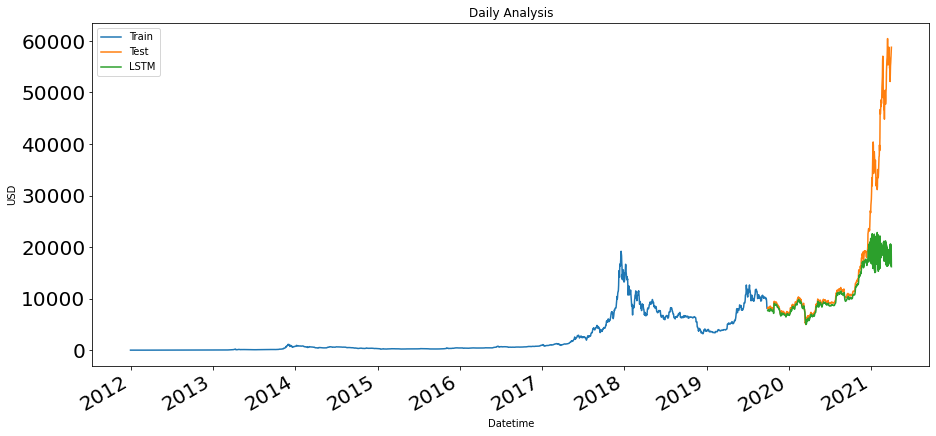

In [101]:
train.Close.plot(figsize = (15,7), title = 'Daily Analysis', fontsize = 20, 
                                                             label = 'Train')
test.Close.plot(figsize = (15,7), title = 'Daily Analysis', fontsize =  20, 
                                                          label = 'Test')
forecasted_LSTM.Close.plot(figsize = (15,7), title = 'Daily Analysis', 
                                                             fontsize =  20, 
                                                              label = 'LSTM')
plt.xlabel('Datetime')
plt.ylabel('USD')
plt.legend(loc = 'best')

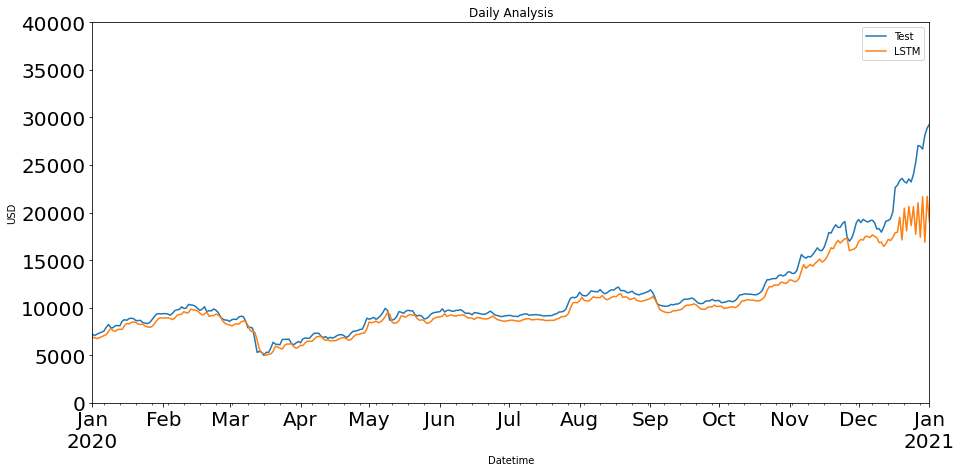

In [107]:
test.Close.plot(figsize = (15,7), title = 'Daily Analysis', fontsize =  20, 
                                                          label = 'Test')
forecasted_LSTM.Close.plot(figsize = (15,7), title = 'Daily Analysis', 
                                                             fontsize =  20, 
                                                              label = 'LSTM')
plt.xlim('2020-01-01','2021-01-01')
plt.ylim( 0,40000)
plt.xlabel('Datetime')
plt.ylabel('USD')
plt.legend(loc = 'best')

In [90]:
test.plot